In [1]:
from sklearn.datasets import load_iris
iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


In [2]:
print(iris_data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
print(type(iris_data.data))
print(iris_data.data.shape)
print(iris_data.target.shape)

<class 'numpy.ndarray'>
(150, 4)
(150,)


In [5]:
print(iris_data.data[0])
print(iris_data.target[0:5])

[5.1 3.5 1.4 0.2]
[0 0 0 0 0]


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.30)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(105, 4) (105,) (45, 4) (45,)


In [7]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression(solver='lbfgs', max_iter=5000)

In [8]:
logistic = logistic.fit(X_train, y_train)
score = logistic.score(X_test, y_test)
print('LogisticRegression score:{}'.format(score))

LogisticRegression score:0.9333333333333333


In [9]:
ypred_test= logistic.predict(X_test)
print(ypred_test)

[0 1 2 1 0 0 1 2 0 1 2 2 2 2 1 1 0 0 2 1 2 0 1 2 2 0 2 2 0 0 0 1 0 1 2 2 1
 0 1 1 0 2 2 2 0]


In [10]:
print(y_test)

[0 1 2 2 0 0 2 2 0 1 2 2 2 2 1 1 0 0 2 2 2 0 1 2 2 0 2 2 0 0 0 1 0 1 2 2 1
 0 1 1 0 2 2 2 0]


In [11]:
for i in range(len(y_test)):
    if (y_test[i] != ypred_test[i]):
        print(i, y_test[i], ypred_test[i])

3 2 1
6 2 1
19 2 1


In [12]:
print("classes", logistic.classes_)
print("Total feature weights", logistic.coef_.shape)
print("Total Bias weights", logistic.intercept_.shape) 
print("Total iterations", logistic.n_iter_) 

classes [0 1 2]
Total feature weights (3, 4)
Total Bias weights (3,)
Total iterations [107]


In [13]:
ypred_logproba= logistic.predict_log_proba(X_test[0:2])
print(ypred_logproba)
ypred_proba= logistic.predict_proba(X_test[0:2])
print(ypred_proba)

[[ -0.02425104  -3.73140856 -15.07159088]
 [ -5.86302113  -0.16564334  -1.89839441]]
[[9.76040651e-01 2.39590643e-02 2.84768041e-07]
 [2.84264271e-03 8.47348399e-01 1.49808959e-01]]


In [14]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
train_score = neigh.score(X_train, y_train)
test_score = neigh.score(X_test, y_test)
print('Knn with K =3 train score:{}'.format(train_score))
print('Knn with K =3 test score:{}'.format(test_score))

Knn with K =3 train score:0.9619047619047619
Knn with K =3 test score:0.9555555555555556


In [15]:
neigh.kneighbors(X_test)

(array([[0.14142136, 0.24494897, 0.24494897],
        [0.26457513, 0.33166248, 0.45825757],
        [0.41231056, 0.93273791, 1.02469508],
        [0.17320508, 0.24494897, 0.28284271],
        [0.2       , 0.3       , 0.3       ],
        [0.14142136, 0.24494897, 0.26457513],
        [0.33166248, 0.36055513, 0.37416574],
        [0.55677644, 0.6164414 , 0.6244998 ],
        [0.1       , 0.14142136, 0.14142136],
        [0.26457513, 0.50990195, 0.71414284],
        [0.53851648, 0.66332496, 0.678233  ],
        [0.41231056, 0.60827625, 0.678233  ],
        [0.37416574, 0.37416574, 0.38729833],
        [0.34641016, 0.37416574, 0.38729833],
        [0.24494897, 0.31622777, 0.31622777],
        [0.31622777, 0.37416574, 0.37416574],
        [0.28284271, 0.3       , 0.3       ],
        [0.34641016, 0.36055513, 0.38729833],
        [0.48989795, 0.50990195, 0.50990195],
        [0.43588989, 0.51961524, 0.58309519],
        [0.42426407, 0.5       , 0.51961524],
        [0.14142136, 0.17320508, 0

In [16]:
neigh.kneighbors_graph(X_test[0:3], mode='distance').toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.24494897, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [17]:
neigh = KNeighborsClassifier(n_neighbors=3, weights='distance')
neigh.fit(X_train, y_train)
train_score = neigh.score(X_train, y_train)
test_score = neigh.score(X_test, y_test)
print('Knn with K =3 train score:{}'.format(train_score))
print('Knn with K =3 test score:{}'.format(test_score))
    

Knn with K =3 train score:1.0
Knn with K =3 test score:0.9555555555555556


In [18]:
neigh = KNeighborsClassifier(n_neighbors=3, metric = 'manhattan')
neigh.fit(X_train, y_train)
train_score = neigh.score(X_train, y_train)
test_score = neigh.score(X_test, y_test)
print('Knn with K =3 train score:{}'.format(train_score))
print('Knn with K =3 test score:{}'.format(test_score))


Knn with K =3 train score:0.9619047619047619
Knn with K =3 test score:0.9555555555555556


In [19]:
from sklearn.metrics import confusion_matrix
y_pred = neigh.predict(X_test)
y_true = y_test
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[15  0  0]
 [ 0 10  0]
 [ 0  2 18]]


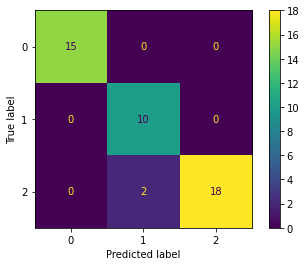

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm).plot()

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=iris_data.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.90      0.95        20

    accuracy                           0.96        45
   macro avg       0.94      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45

